<a href="https://colab.research.google.com/github/Code-Trees/Cifar10/blob/main/Cifar10_25epochs_90_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


Memory Info

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Module Refresh

In [ ]:
def module_refresh():
    import os
    if 'strixbee' in os.listdir():
        os.system("rm -rf strixbee")
        !git clone https://github.com/Code-Trees/strixbee.git
    else:
        !git clone https://github.com/Code-Trees/strixbee.git

In [ ]:
module_refresh()

Cloning into 'strixbee'...
remote: Enumerating objects: 563, done.
remote: Counting objects: 100% (563/563), done.
remote: Compressing objects: 100% (355/355), done.
remote: Total 563 (delta 358), reused 408 (delta 205), pack-reused 0
Receiving objects: 100% (563/563), 690.70 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (358/358), done.


All Imports

In [ ]:
try:
    #main.py
    import warnings
    warnings.filterwarnings('ignore')

    import numpy as np
    import torch   
    import torch.nn.functional as F
    import torch.nn as nn
    from pytorch_lr_finder import LearningRateFinder

    from torch.optim import SGD
    from torch.utils.data import DataLoader
    from torch.utils.data.dataset import Dataset
    from torch.optim.lr_scheduler import  StepLR,OneCycleLR

    from torchvision import transforms,datasets

    import numpy as np
    import matplotlib.pyplot as plt
    from torchsummary import summary
    import random
    import seaborn as sns
    import gc
    import cv2

    import albumentations as A
    from albumentations.augmentations.geometric.resize import Resize
    from albumentations.pytorch.transforms import ToTensorV2

    from rf_calc import receptive_field
    import seaborn as sns
    import matplotlib.pyplot as plt

    from strixbee.utils.data_iter import get_data,get_data_stats
    from strixbee.utils.data_transforms import AlbumDataset
    from strixbee.utils.optimizer_utils import get_optimizer,run_lrfinder
    from strixbee.utils.train_test import *
    from strixbee.utils.gpu import clean_gpu
    from strixbee.utils.plots import * 
    from strixbee.utils.normalize_utils import * 

    from strixbee.utils import *
    from strixbee.model.custom_layer import *
    from strixbee.model import resnet_custom
    from strixbee.gradcam import *

    from strixbee.gradcam.visualize import VisualizeCam
except:
    !pip -q install opencv-python
    !pip -q install -U albumentations
    !pip -q  install opencv-python-headless==4.5.2.52
    !pip -q  install Pillow
    !pip -q  install rf_calc
    !pip -q install torch-lr-finder
    !pip -q install pytorch_lr_finder

    import warnings
    warnings.filterwarnings('ignore')

    import numpy as np
    import torch
    import torch.nn.functional as F
    import torch.nn as nn
    from pytorch_lr_finder import LearningRateFinder

    from torch.optim import SGD
    from torch.utils.data import DataLoader
    from torch.utils.data.dataset import Dataset
    from torch.optim.lr_scheduler import  StepLR,OneCycleLR

    from torchvision import transforms,datasets

    import numpy as np
    import matplotlib.pyplot as plt
    from torchsummary import summary
    import random
    import seaborn as sns
    import gc
    import cv2

    import albumentations as A
    from albumentations.augmentations.geometric.resize import Resize
    from albumentations.pytorch.transforms import ToTensorV2

    from rf_calc import receptive_field
    import seaborn as sns
    import matplotlib.pyplot as plt



    from strixbee.utils.data_iter import get_data,get_data_stats
    from strixbee.utils.data_transforms import AlbumDataset
    from strixbee.utils.optimizer_utils import get_optimizer,run_lrfinder
    from strixbee.utils.train_test import *
    from strixbee.utils.gpu import clean_gpu
    from strixbee.utils.plots import * 
    from strixbee.utils.normalize_utils import * 

    from strixbee.utils import *
    from strixbee.model.custom_layer import *
    from strixbee.model import resnet_custom
    from strixbee.gradcam import *

    from strixbee.gradcam.visualize import VisualizeCam

Data download

Files already downloaded and verified
Files already downloaded and verified
Train Shape: (50000, 32, 32, 3) Test Shape: (10000, 32, 32, 3) 



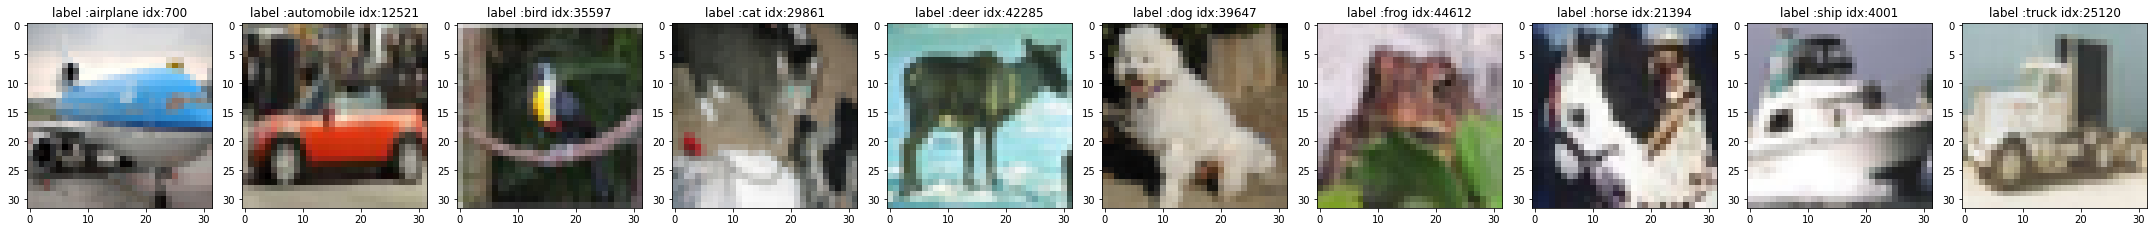

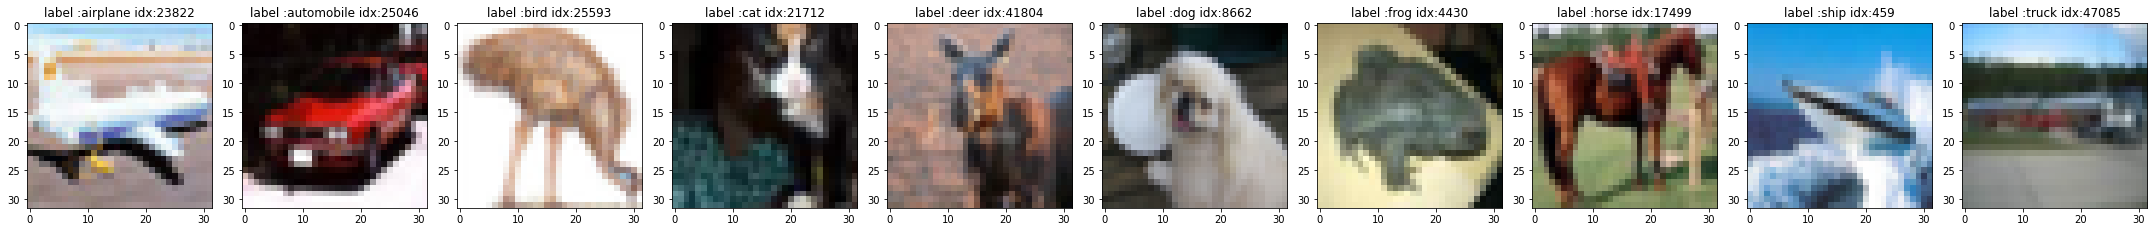

In [ ]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
train,test = get_data()
print(f"Train Shape: {train.data.shape} Test Shape: {test.data.shape} \n")
plot_unique_images(train,labels =labels)
plot_unique_images(train,labels =labels)

Data Distributaiton check

In [ ]:
mean,std  = get_data_stats(train,test,img_norm_typ ='train',plot = False)
print(f"Mean :{mean} , Std :{std}")

Mean :(0.49139967861519745, 0.4821584083946076, 0.44653091444546616) , Std :(0.2470322324632823, 0.24348512800005553, 0.2615878417279641)


<Figure size 1080x360 with 0 Axes>

In [ ]:
def model_test(model,device):
    net = model.to(device)
    y = net(torch.randn(1, 3, 32, 32).to(device))

    print("Pass with {} ".format(y.size()))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model1 = resnet_custom.Cifar_Net_R(norm_type = 'bn',drop_out = 0.03).to(device)
y = model_test(model1,device)
# summary(model,(3,32,32))
# df = receptive_field(model,32)

Pass with torch.Size([1, 10]) 


In [ ]:
train,test = get_data()
#take input as normal_type ['gbn','bn','gn','ln']
mean,std  = get_data_stats(test,train,img_norm_typ ='train',plot = False)

# # Advanced Normalization
# train_transform =A.Compose([A.Resize(32,32),
#                             A.PadIfNeeded (min_height = 40, min_width = 40, border_mode = cv2.BORDER_CONSTANT, value =mean),
#                             A.HorizontalFlip(),
#                             A.CoarseDropout (max_holes=3, max_height=8, max_width=8, min_holes=1, min_height=8, min_width=8, fill_value=mean, p=0.8),
#                             A.ShiftScaleRotate (shift_limit = 0.05, scale_limit = 0.1, rotate_limit = 9, p = 0.5,always_apply = False),
#                             A.RandomCrop (height = 32, width = 32, always_apply = False),
#                             A.Normalize (mean =mean, std = std),
#                             ToTensorV2(transpose_mask =False)
#                             ])
train_transform =A.Compose([A.Resize(32,32),
                            A.Normalize (mean =mean, std = std),
                            A.ShiftScaleRotate (shift_limit= 0.15, scale_limit= 0.15, rotate_limit= 10, p= 0.3),
                            A.Sequential([A.PadIfNeeded (min_height = 40, min_width = 40, border_mode = cv2.BORDER_CONSTANT, value =mean),
                                          A.RandomCrop(height=32, width=32)
                                          ]),
                            A.HorizontalFlip(p = 0.3),
                            A.CoarseDropout (max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=8, min_width=8, fill_value=mean, p=0.3),
                            ToTensorV2(transpose_mask =False)
                            ])

# train_transform =A.Compose([A.Resize(32,32),
#                             A.Sequential([A.PadIfNeeded(min_height=36, min_width=36),
#                                             A.RandomCrop(32, 32)
#                                           ]),
#                             A.HorizontalFlip(),
#                             A.Normalize (mean =mean, std = std),
#                             A.Cutout(num_holes=8),
#                             # A.ShiftScaleRotate (shift_limit= 0.15, scale_limit= 0.15, rotate_limit= 10, p= 0.3),
#                             # A.CoarseDropout (max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=8, min_width=8, fill_value=mean, p=0.3),
#                             ToTensorV2(transpose_mask =False)
#                             ])

test_transform = A.Compose([A.Resize(32,32),
                            A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
                            ToTensorV2(transpose_mask =False), 
                            ])

train_alb = AlbumDataset(train,train_transform)
test_alb = AlbumDataset(test,test_transform)
batch_size =512
args = {'pin_memory':True,'num_workers':4} if torch.cuda.is_available() else {}
train_loader = DataLoader(train_alb,batch_size=batch_size,shuffle = True,**args)
test_loader = DataLoader(test_alb,batch_size=batch_size,**args)

Files already downloaded and verified
Files already downloaded and verified


<Figure size 1080x360 with 0 Axes>

  0%|          | 0/1470 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.22E-03


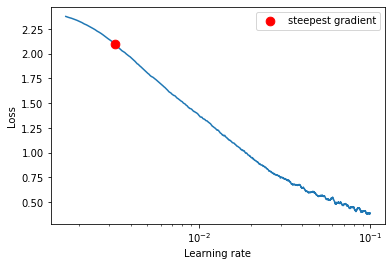

Loss: 0.3778212540503234 LR :0.0032239618788291358


[0.0032239618788291358]

In [ ]:
# start_lr = [ 1e-4,1e-3,1e-2,1e-1,0.1]
# end_lr = [1, 1, 1, 1,1]
start_lr = [0.001]
end_lr =[0.1]

run_lrfinder(model1,device,train_loader,test_loader,start_lr,end_lr)

In [ ]:
def Run_Model(model_class,train_loader,test_loader,epochs, L1 = False,):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print (f'running on {device} \n')
    #take input as normal_type ['gbn','bn','gn','ln']
    model = model_class.to(device)
    try:
        # print(summary(model,input_size = (3,32,32)))
        pass
    except:
        pass
    train_losses = []
    train_accuracy = []
    test_losses =[]
    test_accuracy = []
    lrs = []

    max_lr = 1
    min_lr = max_lr/10
    print("MAX LR: ", max_lr)
    print("MIN LR: ", min_lr)
    

    optimizer = SGD(model.parameters(), lr=min_lr, momentum=0.9,weight_decay = 0.0)
    scheduler = OneCycleLR(optimizer,max_lr=max_lr,steps_per_epoch=len(train_loader),epochs = 25,pct_start=4/24)

    for EPOCHS in range(0,epochs):
        print ("LR :{}\n".format(scheduler.get_last_lr()))
        lrs.append(scheduler.get_last_lr())
        if L1 == True:
            print(f"L1 is {L1}")
            train_loss, train_acc = trainning(model,device,train_loader,optimizer,epochs,)
            train_losses.append(train_loss)
            train_accuracy.append(train_acc)
        else:
            train_loss, train_acc = trainning(model,device,train_loader,optimizer,EPOCHS,scheduler = scheduler)
            train_losses.append(train_loss)
            train_accuracy.append(train_acc)

        test_loss,test_acc = testing(model,device,test_loader,optimizer,EPOCHS)
        test_accuracy.append(test_acc)
        test_losses.append(test_loss)
        print ( f"{'========================================================='*2}\n")
    
        try:
            if (EPOCHS >=5)&(max(test_accuracy[:-1]) < test_accuracy[-1]) & (max(test_accuracy) >= .85):
                checkpoint = {'epoch': EPOCHS + 1,'valid_loss_min': test_losses[-1],'state_dict': model.state_dict(),'optimizer': optimizer.state_dict(),} # Export to TorchScript
                torch.save(checkpoint ,'./Model_cifar10.pt') # Save
                print (f"Achieved: {max(test_accuracy)*100}% Test Accuracy !!")
        except:
            print('Model Saving Failed !!')

        print(f"Best test accuracy {max(test_accuracy)}\n")
    return model,train_losses, train_accuracy,test_losses,test_accuracy,lrs


Files already downloaded and verified
Files already downloaded and verified
running on cuda 

MAX LR:  1
MIN LR:  0.1
LR :[0.040000000000000036]



Train ==> Epochs: 0 Batch:  97 loss: 1.3537756204605103 Accuracy: 39.61% : 100%|██████████| 98/98 [00:14<00:00,  6.83it/s]
Test ==> Epochs: 0 Batch:  19 loss: 0.003913271820545196 Accuracy: 49.81% : 100%|██████████| 20/20 [00:01<00:00, 14.84it/s]



Model Saving Failed !!
Best test accuracy 0.4981

LR :[0.17070387098274542]



Train ==> Epochs: 1 Batch:  97 loss: 1.0495178699493408 Accuracy: 56.50% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 1 Batch:  19 loss: 0.0019128864526748656 Accuracy: 66.78% : 100%|██████████| 20/20 [00:01<00:00, 14.73it/s]



Best test accuracy 0.6678

LR :[0.491634226056506]



Train ==> Epochs: 2 Batch:  97 loss: 0.7312650680541992 Accuracy: 68.77% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 2 Batch:  19 loss: 0.001592164146900177 Accuracy: 72.85% : 100%|██████████| 20/20 [00:01<00:00, 14.60it/s]



Best test accuracy 0.7285

LR :[0.8280125663712506]



Train ==> Epochs: 3 Batch:  97 loss: 0.7919094562530518 Accuracy: 74.87% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 3 Batch:  19 loss: 0.0014070250868797303 Accuracy: 76.75% : 100%|██████████| 20/20 [00:01<00:00, 14.87it/s]



Best test accuracy 0.7675

LR :[0.9966474286191108]



Train ==> Epochs: 4 Batch:  97 loss: 0.7077600359916687 Accuracy: 78.37% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 4 Batch:  19 loss: 0.0012908842921257018 Accuracy: 78.64% : 100%|██████████| 20/20 [00:01<00:00, 15.35it/s]



Best test accuracy 0.7864

LR :[0.9959603520085136]



Train ==> Epochs: 5 Batch:  97 loss: 0.616021990776062 Accuracy: 81.19% : 100%|██████████| 98/98 [00:14<00:00,  6.88it/s]
Test ==> Epochs: 5 Batch:  19 loss: 0.0013402859449386597 Accuracy: 79.30% : 100%|██████████| 20/20 [00:01<00:00, 15.08it/s]



Best test accuracy 0.793

LR :[0.9808033422807966]



Train ==> Epochs: 6 Batch:  97 loss: 0.43203845620155334 Accuracy: 83.26% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 6 Batch:  19 loss: 0.0011266825377941132 Accuracy: 81.63% : 100%|██████████| 20/20 [00:01<00:00, 15.09it/s]



Best test accuracy 0.8163

LR :[0.9547338198279673]



Train ==> Epochs: 7 Batch:  97 loss: 0.4027716815471649 Accuracy: 84.71% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 7 Batch:  19 loss: 0.0009171933144330978 Accuracy: 85.03% : 100%|██████████| 20/20 [00:01<00:00, 14.99it/s]



Achieved: 85.03% Test Accuracy !!
Best test accuracy 0.8503

LR :[0.9183434718407368]



Train ==> Epochs: 8 Batch:  97 loss: 0.3525831401348114 Accuracy: 86.04% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 8 Batch:  19 loss: 0.0010799653708934785 Accuracy: 82.36% : 100%|██████████| 20/20 [00:01<00:00, 15.09it/s]



Best test accuracy 0.8503

LR :[0.8724582322351754]



Train ==> Epochs: 9 Batch:  97 loss: 0.38990578055381775 Accuracy: 86.88% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 9 Batch:  19 loss: 0.0010485411763191223 Accuracy: 84.27% : 100%|██████████| 20/20 [00:01<00:00, 14.83it/s]



Best test accuracy 0.8503

LR :[0.8181195358348948]



Train ==> Epochs: 10 Batch:  97 loss: 0.3281456530094147 Accuracy: 88.11% : 100%|██████████| 98/98 [00:14<00:00,  6.85it/s]
Test ==> Epochs: 10 Batch:  19 loss: 0.0008580746263265609 Accuracy: 86.51% : 100%|██████████| 20/20 [00:01<00:00, 14.88it/s]



Achieved: 86.50999999999999% Test Accuracy !!
Best test accuracy 0.8651

LR :[0.756560681434614]



Train ==> Epochs: 11 Batch:  97 loss: 0.3620721697807312 Accuracy: 88.99% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 11 Batch:  19 loss: 0.0007940137028694153 Accuracy: 87.65% : 100%|██████████| 20/20 [00:01<00:00, 14.75it/s]



Achieved: 87.64999999999999% Test Accuracy !!
Best test accuracy 0.8765

LR :[0.6891788402210848]



Train ==> Epochs: 12 Batch:  97 loss: 0.2709025740623474 Accuracy: 89.55% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 12 Batch:  19 loss: 0.0008313490390777588 Accuracy: 87.13% : 100%|██████████| 20/20 [00:01<00:00, 14.96it/s]



Best test accuracy 0.8765

LR :[0.617503344862548]



Train ==> Epochs: 13 Batch:  97 loss: 0.23579059541225433 Accuracy: 90.55% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 13 Batch:  19 loss: 0.0007502996355295182 Accuracy: 87.65% : 100%|██████████| 20/20 [00:01<00:00, 15.01it/s]



Best test accuracy 0.8765

LR :[0.5431609789937342]



Train ==> Epochs: 14 Batch:  97 loss: 0.35846641659736633 Accuracy: 91.38% : 100%|██████████| 98/98 [00:14<00:00,  6.85it/s]
Test ==> Epochs: 14 Batch:  19 loss: 0.0007270116269588471 Accuracy: 88.96% : 100%|██████████| 20/20 [00:01<00:00, 14.91it/s]



Achieved: 88.96% Test Accuracy !!
Best test accuracy 0.8896

LR :[0.46783905490397637]



Train ==> Epochs: 15 Batch:  97 loss: 0.2318011224269867 Accuracy: 92.00% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 15 Batch:  19 loss: 0.0006992984682321549 Accuracy: 89.42% : 100%|██████████| 20/20 [00:01<00:00, 14.88it/s]



Achieved: 89.42% Test Accuracy !!
Best test accuracy 0.8942

LR :[0.39324711743607904]



Train ==> Epochs: 16 Batch:  97 loss: 0.1698307991027832 Accuracy: 92.83% : 100%|██████████| 98/98 [00:14<00:00,  6.88it/s]
Test ==> Epochs: 16 Batch:  19 loss: 0.0006695374131202698 Accuracy: 90.01% : 100%|██████████| 20/20 [00:01<00:00, 14.79it/s]



Achieved: 90.01% Test Accuracy !!
Best test accuracy 0.9001

LR :[0.3210781432838003]



Train ==> Epochs: 17 Batch:  97 loss: 0.26174572110176086 Accuracy: 93.34% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 17 Batch:  19 loss: 0.000645905938744545 Accuracy: 90.72% : 100%|██████████| 20/20 [00:01<00:00, 14.84it/s]



Achieved: 90.72% Test Accuracy !!
Best test accuracy 0.9072

LR :[0.25297011632850636]



Train ==> Epochs: 18 Batch:  97 loss: 0.1542818248271942 Accuracy: 93.99% : 100%|██████████| 98/98 [00:14<00:00,  6.86it/s]
Test ==> Epochs: 18 Batch:  19 loss: 0.0006639945328235626 Accuracy: 90.50% : 100%|██████████| 20/20 [00:01<00:00, 15.12it/s]



Best test accuracy 0.9072

LR :[0.19046885112076847]



Train ==> Epochs: 19 Batch:  97 loss: 0.17329438030719757 Accuracy: 94.59% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 19 Batch:  19 loss: 0.0006405730202794075 Accuracy: 91.09% : 100%|██████████| 20/20 [00:01<00:00, 14.83it/s]



Achieved: 91.09% Test Accuracy !!
Best test accuracy 0.9109

LR :[0.134992908284148]



Train ==> Epochs: 20 Batch:  97 loss: 0.0870591551065445 Accuracy: 95.35% : 100%|██████████| 98/98 [00:14<00:00,  6.85it/s]
Test ==> Epochs: 20 Batch:  19 loss: 0.0006156936421990394 Accuracy: 91.45% : 100%|██████████| 20/20 [00:01<00:00, 14.97it/s]



Achieved: 91.45% Test Accuracy !!
Best test accuracy 0.9145

LR :[0.08780139813907513]



Train ==> Epochs: 21 Batch:  97 loss: 0.11322025209665298 Accuracy: 95.77% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 21 Batch:  19 loss: 0.0006017529606819153 Accuracy: 91.88% : 100%|██████████| 20/20 [00:01<00:00, 15.04it/s]



Achieved: 91.88% Test Accuracy !!
Best test accuracy 0.9188

LR :[0.049965403292208464]



Train ==> Epochs: 22 Batch:  97 loss: 0.13249528408050537 Accuracy: 95.98% : 100%|██████████| 98/98 [00:14<00:00,  6.85it/s]
Test ==> Epochs: 22 Batch:  19 loss: 0.0005891190752387047 Accuracy: 92.04% : 100%|██████████| 20/20 [00:01<00:00, 15.13it/s]



Achieved: 92.04% Test Accuracy !!
Best test accuracy 0.9204

LR :[0.02234366879878295]



Train ==> Epochs: 23 Batch:  97 loss: 0.1033969521522522 Accuracy: 96.29% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 23 Batch:  19 loss: 0.000578634075820446 Accuracy: 92.26% : 100%|██████████| 20/20 [00:01<00:00, 15.01it/s]



Achieved: 92.25999999999999% Test Accuracy !!
Best test accuracy 0.9226

LR :[0.005563111646424111]



Train ==> Epochs: 24 Batch:  97 loss: 0.09048277884721756 Accuracy: 96.36% : 100%|██████████| 98/98 [00:14<00:00,  6.87it/s]
Test ==> Epochs: 24 Batch:  19 loss: 0.000578683802485466 Accuracy: 92.27% : 100%|██████████| 20/20 [00:01<00:00, 15.08it/s]



Achieved: 92.27% Test Accuracy !!
Best test accuracy 0.9227



<Figure size 1080x360 with 0 Axes>

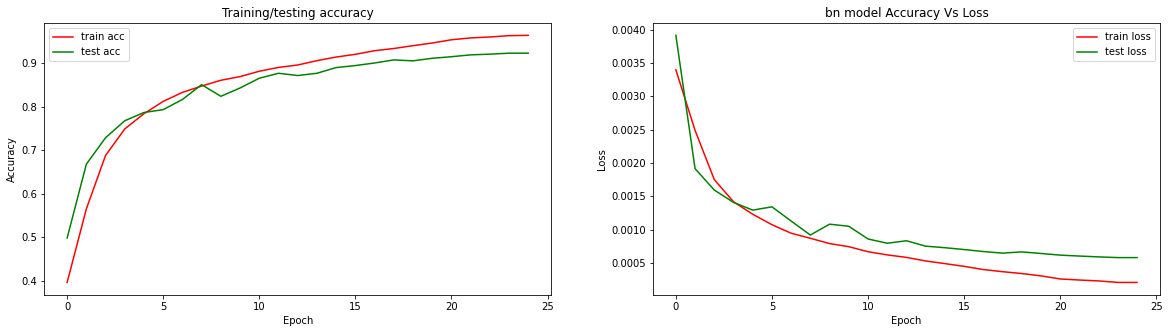

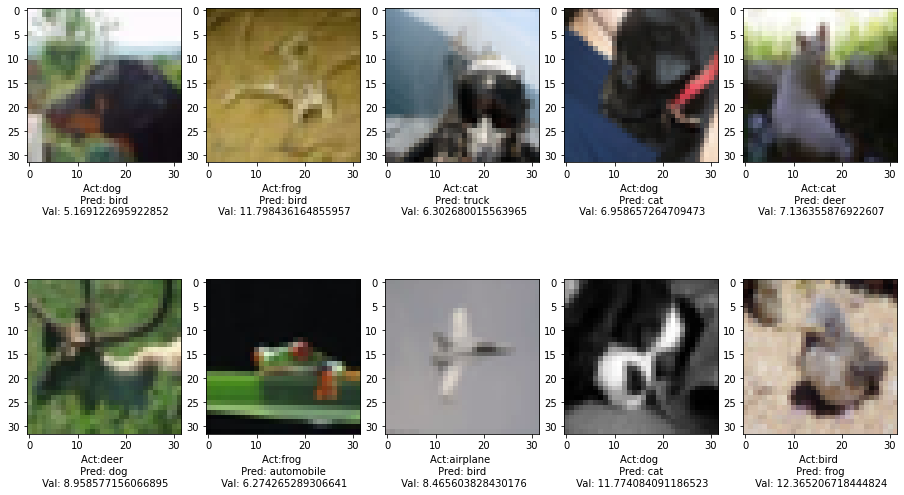

In [ ]:
if __name__ == "__main__":
    batch_size = 512
    epochs =25

    _=torch.manual_seed(1)
    if torch.cuda.is_available():
        _=torch.cuda.manual_seed(1)

    train,test = get_data()
    #take input as normal_type ['gbn','bn','gn','ln']
    # To Un Normalize the test data
    mean,std  = get_data_stats(test,train,img_norm_typ ='train',plot = False)
    
    # # Advanced Normalization
    train_transform =A.Compose([A.Resize(32,32),
                                A.Normalize (mean =mean, std = std),
                                A.ShiftScaleRotate (shift_limit= 0.15, scale_limit= 0.15, rotate_limit= 10, p= 0.3),
                                A.Sequential([A.PadIfNeeded (min_height = 40, min_width = 40, border_mode = cv2.BORDER_CONSTANT, value =mean),
                                            A.RandomCrop(height=32, width=32)
                                            ]),
                                A.HorizontalFlip(p = 0.3),
                                A.CoarseDropout (max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=8, min_width=8, fill_value=mean, p=0.3),
                                ToTensorV2(transpose_mask =False)
                                ])
            
    test_transform = A.Compose([A.Resize(32,32),
                               A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
                               ToTensorV2(transpose_mask =False), ])

    train_alb = AlbumDataset(train,train_transform)
    test_alb = AlbumDataset(test,test_transform)

    args = {'pin_memory':True,'num_workers':4} if torch.cuda.is_available() else {}
    train_loader = DataLoader(train_alb,batch_size=batch_size,shuffle = True,**args)
    test_loader = DataLoader(test_alb,batch_size=batch_size,**args)

    # ['gbn','bn','gn','ln']
    try_type = ['bn']

    for norm_type in try_type:

        model_class =resnet_custom.Cifar_Net_R(norm_type = 'bn',drop_out = 0.00).to(device)
        # model_class = ResNetCustom().to(device)

        model,train_losses, train_accuracy,test_losses,test_accuracy,lrs = Run_Model(model_class,train_loader,test_loader,epochs =epochs)

        plot_acc_loss(norm_type ,train_accuracy,train_losses,test_accuracy,test_losses)
        clean_gpu()

        wrong_images,wrong_labels,right_labels = print_wrong_image(model,test_loader,mean,std,2,5)
        clean_gpu()

        num_img = 20
        correct_pred_imgs = []
        count = 0

        for i in range(num_img):
            correct_pred_imgs.append(torch.as_tensor(random.choice(wrong_images)))

        # target_layers = ["layer1","layer2","layer3","layer4"]
        # viz_cam = VisualizeCam(model,[labels[i] for i in range(0,10)], target_layers)
        # viz_cam(torch.stack(correct_pred_imgs), target_layers, metric="worng")

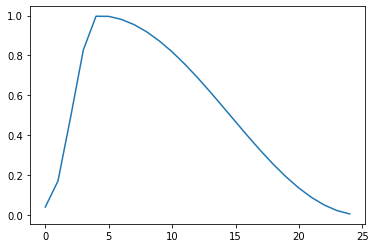

In [ ]:
_ = plt.plot(lrs)

In [ ]:
target_layers = []
for name, layer in model.named_modules():
    if isinstance(layer, nn.Conv2d):
        print(name, "\t")
        # print(layer)
        target_layers.append(name)

prep_layer.0 	
layer1.0 	
ResBlock1.0 	
ResBlock1.4 	
layer2.0 	
layer3.0 	
ResBlock2.0 	
ResBlock2.4 	


In [ ]:
viz_cam = VisualizeCam(model, [labels[i] for i in range(0,10)],target_layers)
viz_cam(torch.stack(correct_pred_imgs), target_layers, metric="worng")

Files already downloaded and verified
Files already downloaded and verified


AttributeError: ignored

<Figure size 1080x360 with 0 Axes>